# Validation of scales using external metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_val = pd.read_excel('data/validation.xlsx')

In [7]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}


In [9]:
df_val

,Partyname,Partyabb,Type_Values,Type_Populism,Type_Populist_Values,V1,V2,V4_Scale,V4_Bin,V4_Ord,...,V19,V20,V21,Elec_year,LSQINDEX,PG_left_right,PG_state_market,PG_liberty_authority,PG_eu_anti_pro,Popu_List
0,Unity List-Red Green Alliance,En-O,1,3,3,8.083333,8.090909,1.250000,0,1,...,4.000000,2.500000,1.500000,2015,0.524404,0.8912,1.2012,1.7524,0.9971,0
1,Danish People's Party,DF,2,4,4,8.666667,8.272727,4.000000,0,2,...,2.833333,3.166667,3.800000,2015,0.524404,8.2269,5.7081,7.8954,1.1830,1
2,Socialist People's Party,SF,1,2,1,8.153846,8.333333,2.333333,0,1,...,5.500000,2.428571,4.000000,2015,0.524404,2.1347,2.1035,2.1476,3.5917,0
3,Christian Democrats,KD,4,2,2,6.111111,7.000000,9.000000,1,4,...,5.750000,2.166667,3.500000,2015,0.524404,5.6982,5.0887,7.0474,5.8301,0
4,Social Democratic Party,SD,1,3,3,8.615385,7.583333,3.333333,0,2,...,6.000000,2.428571,5.666667,2015,0.524404,3.8011,3.5292,4.2722,7.4311,0
5,Conservative People's Party,C,4,2,2,8.083333,8.454545,7.142857,1,3,...,6.000000,2.428571,6.000000,2015,0.524404,7.2186,7.2931,6.5055,7.7791,0
6,"Left, Liberal Party of Denmark",V,3,2,1,8.307692,6.000000,7.000000,1,3,...,5.000000,2.428571,6.333333,2015,0.524404,7.2920,7.3696,4.9957,9.0268,0
7,Liberal Alliance,LA,3,3,3,7.800000,3.111111,8.700000,1,4,...,4.800000,2.000000,3.250000,2015,0.524404,NaN,NaN,NaN,NaN,0
8,Alternative,A,1,2,1,7.600000,4.571429,3.200000,0,2,...,3.833333,2.857143,1.750000,2015,0.524404,NaN,NaN,NaN,NaN,0
9,Radical Left,RV,3,1,1,8.384615,7.916667,6.000000,1,3,...,7.000000,2.571429,4.500000,2015,0.524404,NaN,NaN,NaN,NaN,0


In [16]:
df_val['Partyabb'] = [
    'EL',
    'DF',
    'SF',
    'KD',
    'S',
    'KF',
    'V',
    'LA',
    'ALT',
    'RV'
]

df_val['color'] = df_val['Partyabb'].map(colormap)

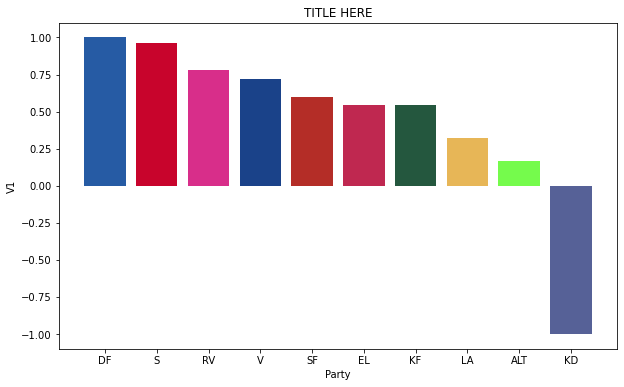

In [32]:
# define a funciton that takes a column from df_val and plots it as as sorted bar chart
def plot_bar(df, col, title, xlabel, ylabel, color):
    df = df.sort_values(col, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Partyabb'], rescale(df[col]), color=df[color])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# define a function that takes a variable and rescales it to the range -1 to 1
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

# use the function to plot the variable V1
plot_bar(df_val, 'V1', 'TITLE HERE', 'Party', 'V1', 'color')